# Lab 3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import numpy.random as rnd
import networkx as nx
%matplotlib inline

## Generating 100 random graphs with n=1000 and p=0,002 and building boxplot result.

In [2]:
l=list()
for i in range(0,100):
    l.append(nx.binomial_graph(1000,0.003))
cl_coef=list()
for x in range(0,100):
    cl_coef.append((np.mean(l[x].degree().values()))/1000)

{'boxes': [<matplotlib.lines.Line2D at 0x112486a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1114db70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1112eda0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1112ef60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111b5ba8>,
  <matplotlib.lines.Line2D at 0x111b5ac8>]}

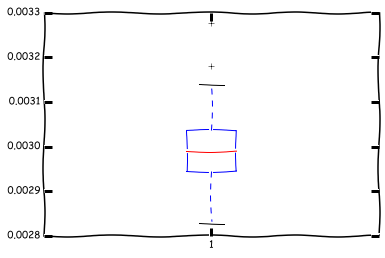

In [3]:
plt.boxplot(cl_coef)

## Building avarage size of small components. Small components was compenents that has less than 100 nodes. As we can see from the plots the mean size of small components is close enough to 1.

In [4]:
avg_small_cc_size=list() 
for o in range(0,100):
    graphs = list(nx.connected_component_subgraphs(l[o]))
    t=list()
    for i in range(1,len(graphs)):
        t.append(nx.number_of_nodes(graphs[i]))
    for q in list(reversed(range(0,len(t)))):
        if t[q]>=100:
            del t[q]
    avg_small_cc_size.append(np.mean(t))
        

(array([  8.,  15.,  28.,  19.,  12.,  13.,   3.,   0.,   1.,   1.]),
 array([ 1.        ,  1.03076923,  1.06153846,  1.09230769,  1.12307692,
         1.15384615,  1.18461538,  1.21538462,  1.24615385,  1.27692308,
         1.30769231]),
 <a list of 10 Patch objects>)

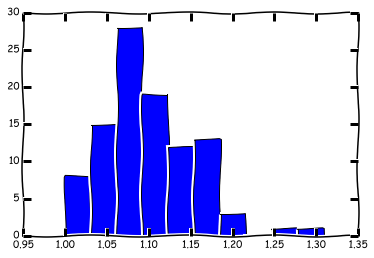

In [5]:
plt.hist(avg_small_cc_size)

{'boxes': [<matplotlib.lines.Line2D at 0x119cf320>],
 'caps': [<matplotlib.lines.Line2D at 0x11a00048>,
 'fliers': [<matplotlib.lines.Line2D at 0x119ea0f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a00b38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8703a20>,
  <matplotlib.lines.Line2D at 0x119cfa90>]}

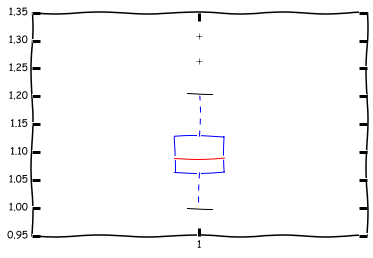

In [6]:
plt.boxplot(avg_small_cc_size)

## This task we want to see how average path lenght and transitivity depends from p. To bulid this dependes 100 graphs was build. After that i have taken a subgraphs of our graph (because they was not connected). I have taken graphs with at least 1 edge and than look on average path length for each node at each subgraph and after that calculate average path lenght in whole graph. 

In [3]:
task_3_list=list()
for p in np.linspace(0.001,0.1, num=33):
    task_3_list.append(nx.binomial_graph(1000,p))
spl=list()
trans_coef=list()
P=np.linspace(0.001,0.1, num=33)


In [4]:
for x in task_3_list:
    trans_coef.append(nx.transitivity(x))
    graphs = list(nx.connected_component_subgraphs(x))
    for i in list(reversed(range(0,len(graphs)))):
        if nx.number_of_nodes(graphs[i])==1:
            del graphs[i]
    t=list()
    for g in graphs:
        t.append(nx.average_shortest_path_length(g))
    spl.append(np.mean(t))      

## As we can see from the plots the average path lenght increase on the first step (maximum value 5 in point 0.004 and then nonlinear decrease. Transitivity coefficient behave like a linear fuction from P.

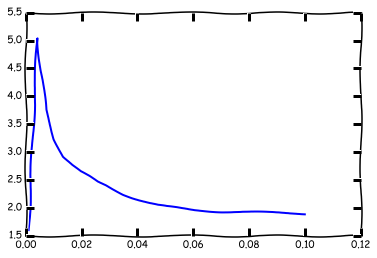

In [17]:
plt.plot(P,spl)

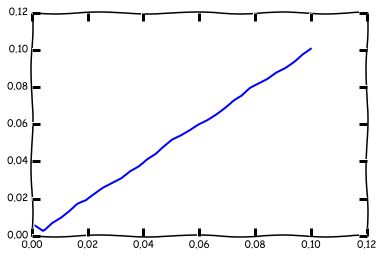

In [18]:
plt.plot(P,trans_coef)